<a href="https://colab.research.google.com/github/asimds/26DECOPFAIL/blob/main/Cause.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#reading pickle file
import pandas as pd
of_df = pd.read_pickle('/content/drive/MyDrive/26Dec21/of_df_26dec')

In [2]:
#resetting index of dataframe
new_df=of_df.reset_index()

In [3]:
#head of dataframe
new_df.head()

,index,MOBILE NUMBER,MESSAGE TEXT,STATUS,CAUSE,SMSTYPE,NUMBER MESSAGES,DELIVERY CODE,RETRY STATUS
0,507,919595401019,<#> Your GalaxyCard OTP is 247001. Do not shar...,Operator Failed,Number not reachable,TEXT,1,001,F
1,673,918444824217,<#> Your GalaxyCard OTP is 228439. Do not shar...,Operator Failed,Number not reachable,TEXT,1,001,F
2,737,919962651046,<#> Your GalaxyCard OTP is 853235. Do not shar...,Operator Failed,Number does not exist,TEXT,1,003,F
3,1020,919773259844,<#> Your GalaxyCard OTP is 556322. Do not shar...,Operator Failed,Number not reachable,TEXT,1,001,F
4,1080,919404615966,<#> Your GalaxyCard OTP is 095724. Do not shar...,Operator Failed,Number not reachable,TEXT,1,002,F


In [4]:
#dropping index column
new_df.drop('index', axis=1, inplace=True)

In [5]:
#checking columns after drop
new_df.columns

Index(['MOBILE NUMBER', 'MESSAGE TEXT', 'STATUS', 'CAUSE', 'SMSTYPE',
       'NUMBER MESSAGES', 'DELIVERY CODE', 'RETRY STATUS'],
      dtype='object')

In [6]:
#renaming columns for easy access 
new_df.columns = new_df.columns.str.replace(' ', '_')

In [7]:
#cheking head after renaming
new_df.head(2)

,MOBILE_NUMBER,MESSAGE_TEXT,STATUS,CAUSE,SMSTYPE,NUMBER_MESSAGES,DELIVERY_CODE,RETRY_STATUS
0,919595401019,<#> Your GalaxyCard OTP is 247001. Do not shar...,Operator Failed,Number not reachable,TEXT,1,001,F
1,918444824217,<#> Your GalaxyCard OTP is 228439. Do not shar...,Operator Failed,Number not reachable,TEXT,1,001,F


In [8]:
#printing value counts
for i in new_df.columns:
    x = new_df[i].value_counts()
    print("Column name is:",i,"and it value is:",x)

Column name is: MOBILE_NUMBER and it value is: 918003001947    17973
916626552400     9350
918527355100     8162
917619630838     3938
918061799600     3842
                ...  
916295949110        1
919106028872        1
918268056064        1
917644918318        1
916300448453        1
Name: MOBILE_NUMBER, Length: 759337, dtype: int64
Column name is: MESSAGE_TEXT and it value is: Pay your GalaxyCard dues by using below mention...    31689
Urgent! Pay your GalaxyCard dues immediately to...    22210
ANIL YADAV added you as reference on GalaxyCard...    17987
GAURAV KUMAR GUPTA added you as reference on Ga...    17482
SUNIL KUMAR added you as reference on GalaxyCar...    17052
                                                      ...  
Your GalaxyCard bill of Rs. 7,101.15 is overdue...        1
Your GalaxyCard bill of Rs. 3,475.44 is overdue...        1
Your GalaxyCard bill of Rs. 1,207.21 is way pas...        1
Your GalaxyCard bill of Rs. 3,120.3 is overdue....        1
Your GalaxyCard

In [18]:
new_df.describe()

,MOBILE_NUMBER,MESSAGE_TEXT,STATUS,CAUSE,SMSTYPE,NUMBER_MESSAGES,DELIVERY_CODE,RETRY_STATUS
count,7008162,7008162,7008162,7008162,7008162,7008162,7008162,7008162
unique,759337,134005,1,14,3,4,17,1
top,918003001947,Pay your GalaxyCard dues by using below mentio...,Operator Failed,Number not reachable,TEXT,1,001,F
freq,17973,31689,7008162,4443388,6732117,5867847,3025493,7008162


The freq is tied to the top immediately above it. top is the most frequent element, freq is how many times that most frequent element was seen.

In [9]:
#importing libraries for visualisation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import warnings
warnings.filterwarnings("ignore")


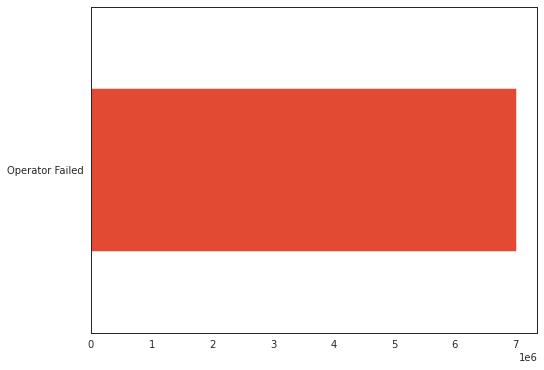

In [10]:
#counts with respect to Status type
new_df.STATUS.value_counts().sort_values().plot(kind = 'barh');

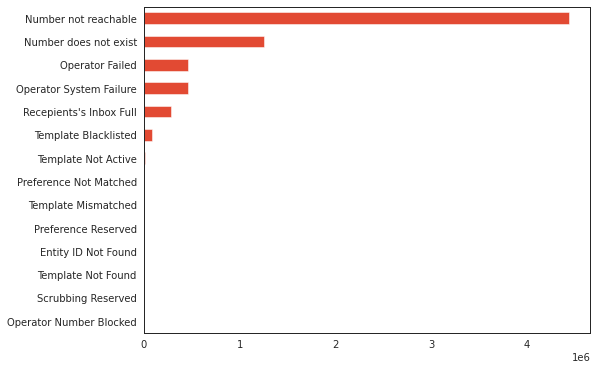

In [11]:
#count with respect to cause
new_df.CAUSE.value_counts().sort_values().plot(kind = 'barh');

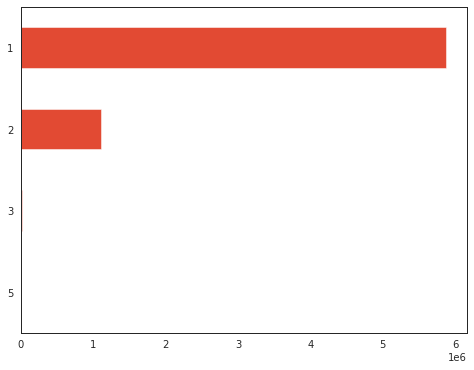

In [12]:
#count with respect to number message
new_df.NUMBER_MESSAGES.value_counts().sort_values().plot(kind = 'barh');


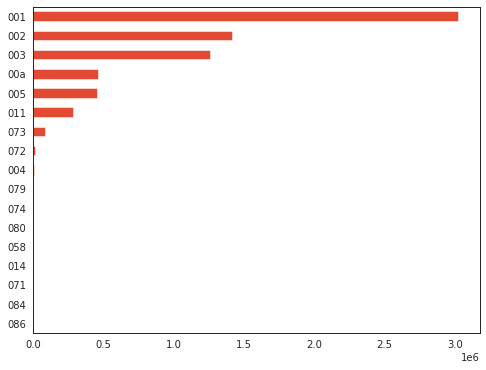

In [13]:
#count with respect to delivery code
new_df.DELIVERY_CODE.value_counts().sort_values().plot(kind = 'barh');

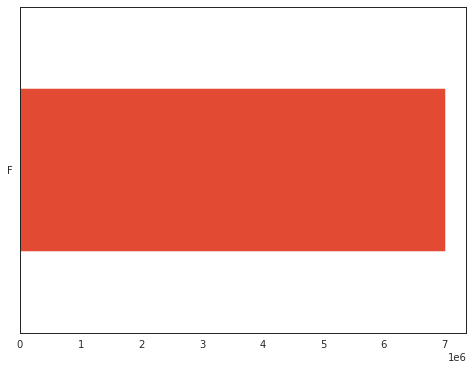

In [14]:
#counts wrt Retry status type
new_df.RETRY_STATUS.value_counts().sort_values().plot(kind = 'barh');

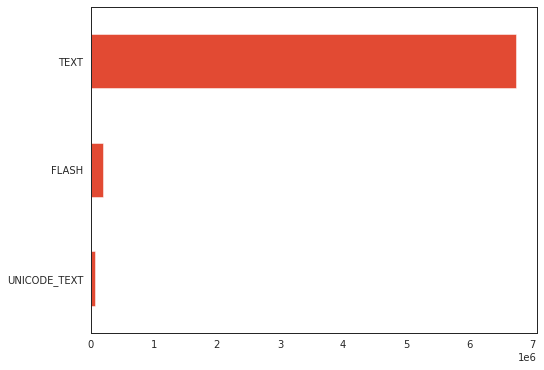

In [15]:
#counts wrt SMS type
new_df.SMSTYPE.value_counts().sort_values().plot(kind = 'barh');


In [19]:
#creating new dataframe for message analysis
df = new_df.MESSAGE_TEXT.value_counts().rename_axis('unique_values').reset_index(name='counts')

                                            unique_values  counts
0       Pay your GalaxyCard dues by using below mentio...   31689
1       Urgent! Pay your GalaxyCard dues immediately t...   22210
2       ANIL YADAV added you as reference on GalaxyCar...   17987
3       GAURAV KUMAR GUPTA added you as reference on G...   17482
4       SUNIL KUMAR added you as reference on GalaxyCa...   17052
...                                                   ...     ...
134000  Your GalaxyCard bill of Rs. 7,101.15 is overdu...       1
134001  Your GalaxyCard bill of Rs. 3,475.44 is overdu...       1
134002  Your GalaxyCard bill of Rs. 1,207.21 is way pa...       1
134003  Your GalaxyCard bill of Rs. 3,120.3 is overdue...       1
134004  Your GalaxyCard bill of Rs. 1,284.1 is overdue...       1

[134005 rows x 2 columns]


In [22]:
#displaying top 50 messages where we have OPERATOR FAILED AS STATUS
df.head(50)

,unique_values,counts
0,Pay your GalaxyCard dues by using below mentio...,31689
1,Urgent! Pay your GalaxyCard dues immediately t...,22210
2,ANIL YADAV added you as reference on GalaxyCar...,17987
3,GAURAV KUMAR GUPTA added you as reference on G...,17482
4,SUNIL KUMAR added you as reference on GalaxyCa...,17052
5,SIDHANTA NAYAK added you as reference on Galax...,16950
6,RAJESH KUMAR added you as reference on GalaxyC...,16810
7,KRISHNA KUMAR NISHAD added you as reference on...,16332
8,DEEPAK KUMAR added you as reference on GalaxyC...,15216
9,MUKESH KUMAR added you as reference on GalaxyC...,15194
